<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>


# Project 1: Catalan numbers

<div markdown=1 class=Abstract>
* 30% Recursion
* 20% Combinatorics
* 20% Asymptotics
* 10% Generating functions
* 10% Arithmetic
* 10% SymPy

## Table of contents

- [Computing Catalan numbers](#Computing)
- Dealing with large Catalan numbers
  * [Catalan and modulos: the Bostan Conjecture](#Bostan)
  * [Length of Catalan numbers](#Asymptotics)
- [Catalan and generating functions](#CatalanGF)
- [Combinatorial interpretations of Catalan numbers](#Combinatorial)
  * [Paths in a triangle](#Triangle)
  * [Well-formed parentheses expressions](#Parentheses)
  * [Binary trees](#Trees)


In [2]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/customProject.css").read()
    return HTML(styles)
css_styling()


IOError: [Errno 2] No such file or directory: './style/customProject.css'

In [3]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
from pylab import *

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


Here are two cells that you can copy/paste throughout the Notebook:

<div markdown=1 class="Answers"> 
<i>Your answer.</i>

<div markdown=1 class="Prop"> 
<i>In this cell you can add your own additional questions (math or python).</i>

<a id="Computing"></a>
# Computing Catalan numbers

The <a href="https://en.wikipedia.org/wiki/Catalan_number">Catalan numbers</a> $c_0,c_1,c_2,\dots$ are defined recursively as follows:
\begin{align*}
c_0&=1\\
c_1&=1\\
c_n&=\sum_{k=0}^{n-1} c_kc_{n-1-k}=c_0c_{n-1}+c_1c_{n-2}+\dots +c_{n-1}c_0 \qquad (\text{ for }n\geq 2). \tag{$\star$}
\end{align*}
For instance,
\begin{align*}
c_2&=c_0c_1+c_1c_0=1\times 1+1\times 1=2,\\
c_3&=c_0c_2+c_1c_1+c_2c_0=1\times 2+1\times 1+2\times 1=5,\\
\dots
\end{align*}


<div markdown=1 class="DoIt"> 
1. Write a recursive function `CatalanRecursive(n)` which returns the $n$-th Catalan number.
2. Write a non recursive function `CatalanNotRecursive(n)` which returns the $n$-th Catalan number.<br>
<i>(You must also use recursive formula ($\star$) but your function `CatalanNotRecursive(n)` should not call itself.)</i>

In [47]:
def CatalanRecursive(n):
    if n==0 or n==1:
        return 1
    if n > 1:
        Sum = 0
        for k in range(0,n):
            Sum += CatalanRecursive(k)*CatalanRecursive(n-1-k)
    return Sum
print(CatalanRecursive(5))
 
def CatalanNotRecursive(n):
    Cn= [1,1]
    if n == 0 or n == 1: return 1
    for i in range(2,n+1):
        ci = 0
        for k in range (0,i):
            ci += Cn[k]*Cn[i-1-k]
        Cn.append(ci)
        print (Cn)
    return ci

print('the answer is')
print (CatalanNotRecursive(5))

42
the answer is
[1, 1, 2]
[1, 1, 2, 5]
[1, 1, 2, 5, 14]
[1, 1, 2, 5, 14, 42]
42


<div markdown=1 class="DoIt"> 
Compare the execution times of your different functions computing the Catalan numbers (say, for $1\leq n\leq 15$).<br>
You can import the `time` library:
```
import time
```

[1, 1, 2]
[1, 1, 2]
[1, 1, 2, 5]
[1, 1, 2]
[1, 1, 2, 5]
[1, 1, 2, 5, 14]
[1, 1, 2]
[1, 1, 2, 5]
[1, 1, 2, 5, 14]
[1, 1, 2, 5, 14, 42]
[1, 1, 2]
[1, 1, 2, 5]
[1, 1, 2, 5, 14]
[1, 1, 2, 5, 14, 42]
[1, 1, 2, 5, 14, 42, 132]
[1, 1, 2]
[1, 1, 2, 5]
[1, 1, 2, 5, 14]
[1, 1, 2, 5, 14, 42]
[1, 1, 2, 5, 14, 42, 132]
[1, 1, 2, 5, 14, 42, 132, 429]
[1, 1, 2]
[1, 1, 2, 5]
[1, 1, 2, 5, 14]
[1, 1, 2, 5, 14, 42]
[1, 1, 2, 5, 14, 42, 132]
[1, 1, 2, 5, 14, 42, 132, 429]
[1, 1, 2, 5, 14, 42, 132, 429, 1430]
[1, 1, 2]
[1, 1, 2, 5]
[1, 1, 2, 5, 14]
[1, 1, 2, 5, 14, 42]
[1, 1, 2, 5, 14, 42, 132]
[1, 1, 2, 5, 14, 42, 132, 429]
[1, 1, 2, 5, 14, 42, 132, 429, 1430]
[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]
[1, 1, 2]
[1, 1, 2, 5]
[1, 1, 2, 5, 14]
[1, 1, 2, 5, 14, 42]
[1, 1, 2, 5, 14, 42, 132]
[1, 1, 2, 5, 14, 42, 132, 429]
[1, 1, 2, 5, 14, 42, 132, 429, 1430]
[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]
[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796]
[1, 1, 2]
[1, 1, 2, 5]
[1, 1, 2, 5, 14]
[1, 1, 2, 5, 14, 42]

ValueError: x and y must have same first dimension, but have shapes (14,) and (1,)

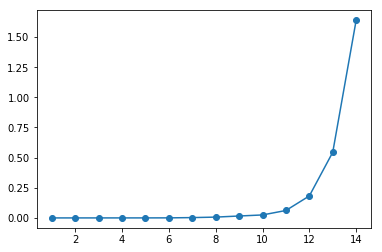

In [51]:
import time

RunningTimeCatalanRecursive=[]
RunningTimeCatalanNotRecursive=[]
a=1
b=15

for n in range(a,b):
    time1=time.clock()
    CatalanRecursive(n)
    time2=time.clock()
    RunningTimeCatalanRecursive.append(time2-time1)
    
for n in range(a,b):
    time1=time.clock()
    CatalanNotRecursive(n)
    time2=time.clock()
    RunningTimeCatalanNotRecursive.append(time2-time1)

N=range(a,b)    
plt.plot(N,RunningTimeCatalanRecursive,'o-',label='recursive')
plt.plot(N,CatalanNotRecursive,'o',label='GF')
plt.legend()
plt.show()

<div markdown=1 class="Rmk"><a id="EquationE"></a> 
It can be proved that for every $n$
$$
c_{n}=\frac{1}{n+1}\binom{2n}{n}. \tag{E}
$$
You may try to use this formula to write another non-recursive function which returns $c_n$. Yet the formula (E) will not be useful for the rest of the project.

In [80]:
import math
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)
print(nCr(6,3))

def E(n):
    if n==0: return 1
    else:
        return nCr(2*n,n)/((n+1))
    #Cn= 1/(n+1)*(math.factorial((2*n)))/(math.factorial((2*n-n))*math.factorial((n)))

print(E(5))

20
42


<a id="CatalanGF"></a>
# Catalan and generating functions

Let 
$$
\mathcal{C}(x)=\sum_{n\geq 0}c_n x^n=1+x+2x^2+5x^3+\dots
$$
denote the generating function of the Catalan numbers.

<div markdown=1 class="DoIt"> 

1. **(Theory)** Use the recursive formula [($\star$)](#Computing) to prove that $\mathcal{C}(x)$ is a solution of the following equation of degree two: <br>
$$
\mathcal{C}(x)=1+x\mathcal{C}(x)^2. 
$$
<br>
(In this equation, $\mathcal{C}(x)$ is the unknown and $x$ is a parameter.)
2. Use SymPy to deduce a formula for $\mathcal{C}(x)$. What is the radius of convergence?

<div markdown=1 class="DoIt"> You can deduce another programm which computes the Catalan numbers using $\mathcal{C}(x)$, and compare the execution times with the functions of the first part of the Project.

### A variant: Motzkin numbers

The <i>Motzkin numbers</i> $m_0,m_1,m_2,\dots$ are similar to Catalan numbers and defined by $m_0=m_1=1$ and for every $n\geq 2$
$$
m_n=m_{n-1}+\sum_{k=0}^{n-2}m_km_{n-2-k}.
$$

<div markdown=1 class="DoIt"> **(Theory + SymPy)** 
1. Find the generating function $\mathcal{M}(x)=\sum_{n\geq 0}m_nx^n$. 
2. Compare the radius of convergence of $\mathcal{C}$ and $\mathcal{M}$. Which sequence is growing fastest between $(c_n)$ and $(m_n)$?

# Dealing with large Catalan numbers

<a id="Bostan"></a>
## Catalan and modulos: the Bostan Conjecture

<div markdown=1 class="DoIt"> 
Alin Bostan (computer scientist at INRIA and Ecole Polytechnique) conjectured a few years ago <a href="http://www.mat.univie.ac.at/%7Eslc/wpapers/s80vortrag/bostan.pdf">(see this link p.26)</a> that in basis 10 the last digit of $c_n$ is never $3$. So far this is still an open problem.<br>
1. Check the conjecture for $1\leq n\leq 100$. The output should look like
```python
Catalan 1 mod 10 is 1: the Conjecture is True
Catalan 2 mod 10 is 2: the Conjecture is True
Catalan 3 mod 10 is 5: the Conjecture is True
Catalan 4 mod 10 is 4: the Conjecture is True
...
```
2. How to check the conjecture for very large values? Try for example with $7000\leq n\leq 7100$.<br>
<i>(Hint: Be careful how you compute $c_n \mod 10$, since $c_n$ grows very fast!)</i>


<a id="Asymptotics"></a>
## The <i>length</i> of Catalan numbers

It can be proved (this is beyond the level of Bachelor 2, a possible reference is p.384 in Ph.Flajolet, R.Sedgewick, <i>Analytic Combinatorics</i>) that for every $n$ we have
$$
\frac{4^n}{\sqrt{\pi n^3}}\big(1-\frac{9}{8n}\big) \leq c_n \leq \frac{4^n}{\sqrt{\pi n^3}}, \tag{App}
$$
which yields very good approximations when $n$ is large.
We will use this approximation to estimate the <i>length</i> (<i>i.e.</i> the number of digits) of $c_n$ when $n$  is a power of ten.

<div markdown=1 class="DoIt"> 
Consider the following table which records the <i>length</i> of $c_{10}$, $c_{100}$, $c_{1000}$,...


<font size="+3">
<table>
            <tr>
                <td width="100"> $c_{10^n}$</td>
                <td > Number of digits of $c_{10^n}$</td>
            </tr>
            <tr>
                <td width="100"> $c_{10}$</td>
                <td > 5</td>
            </tr>
            <tr>
                <td width="100"> $c_{100}$</td>
                <td > 57</td>
            </tr>
            <tr>
                <td width="100"> $c_{10^3}$</td>
                <td > 598</td>
            </tr>
            <tr>
                <td width="100"> $c_{10^4}$</td>
                <td > 6015</td>
            </tr>
            <tr>
                <td width="100"> $c_{10^5}$</td>
                <td > 60199</td>
            </tr>
            <tr>
                <td width="100"> $c_{10^6}$</td>
                <td > 602051</td>
            </tr>
</table>
</font>

(For instance, $c_{10}=16796$ which has $5$ digits.)

The goal is to complete the table. (An interesting challenge could be to break the record of <a href="https://oeis.org/A114466">this sequence in the Online Encyclopedia of Integer Sequences</a>!)<br>
For that purpose you have to
1. **(Theory)** Find somewhere (or reprove) the formula which gives the number of digits of a given integer.
2. Use this formula and python to complete the table. **Warning:** Do not try to explicitly compute $Cat_{10^n}$ since they grow too fast. Instead you need to figure out how to use equation (App) above.

<div markdown=1 class="DoIt">  **(Theory)** For larger and larger $n$'s the right column always begins with the same digits ($60205...$). Can you explain this pattern?

(<i>Hint: Again, you should use equation </i>(App)<i>.</i>)

<a id="Combinatorial"></a>
# Three combinatorial interpretations of $c_n$

<a id="Triangle"></a>
## Paths on a triangle

Let $\mathcal{T}\subset \mathbb{N}^2$ denote the infinite "triangle"
$$
\mathcal{T}=\big\{(k,n),\quad 0\leq k\leq n \big\}
$$
(see the figure below).

For $(k,n) \in \mathcal{T}$ we denote by $P_{k,n}$ the number of paths such that:
* the path starts at $(0,0)$ ends at $(n,k)$ and entirely lies inside $\mathcal{T}$
* the paths only takes unit steps in the North and East directions.

For example this figure shows that $P_{2,3}=5$:

<img src="figures/Escalier.jpg" width='500px' >
    

<div markdown=1 class="DoIt"> 
1. Write a function `Paths(K,N)` which returns a table (or a matrix) of all the values of $P_{k,n}$ for $k\leq K, n\leq N$.<br>
<i>(Hint: Think recursive!)</i>
2. Do you see on your table the connection with the Catalan numbers? **(Difficult)** Can you prove it?

<a id="Parentheses"></a>
##  Well-formed parentheses expressions

It can be shown that $c_n$ counts the number of expressions containing $n$ pairs of parentheses which are <i>correctly matched</i>. For the first values we obtain
$$
\begin{array}{r c c c c c}
n=1: & ()   &       &     &     &      \\
n=2: & (()) & ()()  &     &     &      \\
n=3: & ((())) & (())()  &  ()(())    &  ()()()   &  (()())    \\
\end{array}
$$

<div markdown=1 class="DoIt"> 
1. Write a recursive function `Parentheses(n)` which returns the list of all well-formed parentheses expressions with $n$ pairs of parentheses.
2. Check for different values that the list has length $c_n$.

<div markdown=1 class="DoIt"> **(Theory)** Prove that the number of well-formed parentheses expressions is counted by Catalan numbers.

<a id="Trees"></a>
## Binary trees

A <i>binary tree</i> is a tree in which every internal node (in grey in above pictures) has exactly two children. Leaves (in green) have no children. The **size** of a binary tree is its number of internal nodes. There is one binary tree of size $1$, and two binary trees of size $2$, five binary trees of size $3$:
<br>
<img src="./figures/BinaryTree.jpg" style="width: 700px;"/>

Let $t_n$ be the number of binary trees of size $n$, by convention we put $t_0=1$ (this corresponds to a leaf without any internal node).

<div markdown=1 class="DoIt"> 
**(Theory)** Prove that $t_n$ is the $n$-th Catalan number.